¿Cuántas iteraciones se hicieron antes de encontrar la primera solución? 2
¿Cuántas iteraciones se hicieron antes de encontrar la última solución? 2
La lista con todos los caminos encontrados:
Camino 1: H -> D
El camino o la lista con todos los caminos más cortos:
Camino más corto 1: H -> D


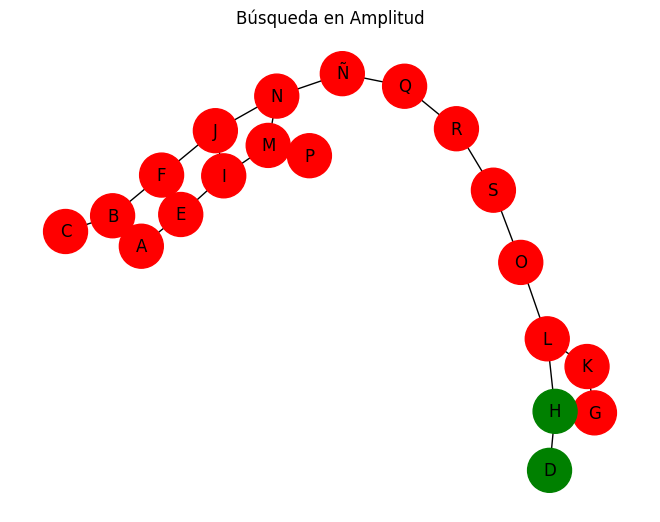

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'E'],
    'B': ['A', 'C', 'F'],
    'C': ['B'],
    'D': ['H'],
    'E': ['A', 'F', 'I'],
    'F': ['B', 'E', 'J'],
    'G': ['H', 'K'],
    'H': ['D', 'G', 'L'],
    'I': ['E', 'J', 'M'],
    'J': ['F', 'I', 'N'],
    'K': ['G', 'L'],
    'L': ['H', 'K', 'O'],
    'M': ['I', 'N', 'P'],
    'N': ['J', 'M', 'Ñ'],
    'Ñ': ['N', 'Q'],
    'O': ['L', 'S'],
    'P': ['M'],
    'Q': ['Ñ', 'R'],
    'R': ['Q', 'S'],
    'S': ['O', 'R']
}

nodo_inicio = input('Ingresa el nodo de inicio: ')
nodo_objetivo = input('Ingresa el nodo de objetivo: ')

def busqueda_amplitud(grafo, inicio, objetivo):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    caminos = []
    iteracion_primera_solucion = None
    iteracion_ultima_solucion = 0
    i = 1
    while cola:
        nodo_actual, camino = cola.popleft()
        if nodo_actual == objetivo:
            caminos.append(camino)
            if iteracion_primera_solucion is None:
                iteracion_primera_solucion = i
            iteracion_ultima_solucion = i
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    cola.append((vecino, nueva_ruta))
        i += 1
    return caminos, iteracion_primera_solucion, iteracion_ultima_solucion

caminos, iteracion_primera_solucion, iteracion_ultima_solucion = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)

# Imprimimos las estadísticas solicitadas
print(f"¿Cuántas iteraciones se hicieron antes de encontrar la primera solución? {iteracion_primera_solucion}")
print(f"¿Cuántas iteraciones se hicieron antes de encontrar la última solución? {iteracion_ultima_solucion}")
print("La lista con todos los caminos encontrados:")
for i, camino in enumerate(caminos):
    print(f"Camino {i+1}: {' -> '.join(camino)}")

# Encontrar el/los camino(s) más corto(s)
longitud_minima = min(len(camino) for camino in caminos)
caminos_mas_cortos = [camino for camino in caminos if len(camino) == longitud_minima]
print("El camino o la lista con todos los caminos más cortos:")
for i, camino in enumerate(caminos_mas_cortos):
    print(f"Camino más corto {i+1}: {' -> '.join(camino)}")

# Crear y mostrar el gráfico (código existente sin cambios)
G = nx.Graph(grafo)
colores = []
for nodo in G.nodes():
    en_camino = any(nodo in camino for camino in caminos)
    colores.append('green' if en_camino else 'red')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()